/home/chai/miniconda3/envs/tensorflow_20230914/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


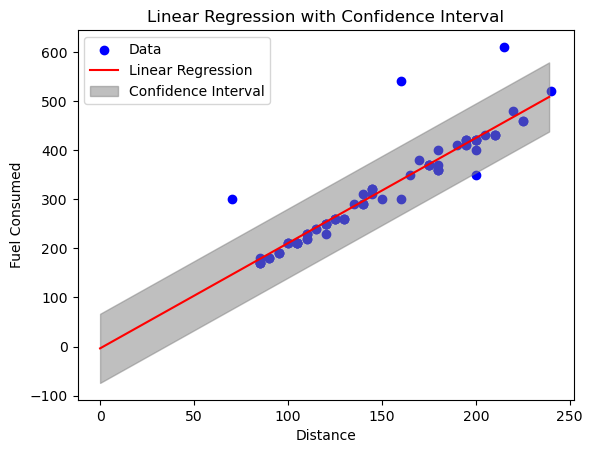

     Distance  Lower_Bound  Upper_Bound
0           0   -73.867714    66.805372
1           1   -71.726719    68.946367
2           2   -69.585724    71.087362
3           3   -67.444729    73.228357
4           4   -65.303734    75.369352
..        ...          ...          ...
235       235   429.266071   569.939157
236       236   431.407066   572.080152
237       237   433.548061   574.221147
238       238   435.689056   576.362141
239       239   437.830050   578.503136

[240 rows x 3 columns]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn import datasets
import pandas as pd

df = pd.read_csv('fuel_distance.csv')

x = df[['distance']]
y = df['fuel']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make predictions on the original set
y_pred = model.predict(x)

# Calculate the confidence interval for predictions
alpha = 0.05  # significance level (e.g., 95% confidence interval)
n = len(x)
t_value = stats.t.ppf(1 - alpha / 2, df=n - 2)  # t-distribution value for the confidence interval
std_err = np.std(y - y_pred)  # Standard error of the residuals
margin_of_error = t_value * std_err

# Create Simple and rounded X (your distance) from 0 to 7
X_test = np.arange(df['distance'].max()).reshape(-1, 1)

# Make predictions on the new test set
y_pred = model.predict(X_test)

# Calculate lower and upper bounds of the confidence interval
lower_bound = y_pred - margin_of_error
upper_bound = y_pred + margin_of_error

# Create a DataFrame to store X_test, lower bound, and upper bound
confidence_df = pd.DataFrame({'Distance': X_test.squeeze(), 'Lower_Bound': lower_bound.squeeze(), 'Upper_Bound': upper_bound.squeeze()})

# Visualize the linear regression line and confidence interval
plt.scatter(x, y, label='Data', color='b')
plt.plot(X_test, y_pred, label='Linear Regression', color='r')
plt.fill_between(X_test.squeeze(), lower_bound.squeeze(), upper_bound.squeeze(), color='gray', alpha=0.5, label='Confidence Interval')
plt.xlabel('Distance')
plt.ylabel('Fuel Consumed')
plt.title('Linear Regression with Confidence Interval')
plt.legend()
plt.show()

# Display the DataFrame containing X_test, lower bound, and upper bound
print(confidence_df)